In [46]:
import cv2
import numpy as np

from skimage import data
from skimage.util import invert
from skimage.draw import line, polygon

from matplotlib import pyplot as plt

In [140]:
images = list()
images.append(np.array(invert(data.horse())).astype('uint8'))
images.append(np.array(data.binary_blobs(200, blob_size_fraction=.2,
                          volume_fraction=.35, rng=1)).astype('uint8'))

_img = np.zeros(images[0].shape).astype('uint8')
arrow = np.array((
    (300, 200),
    (100, 50),
    (150, 200),
    (100, 350),
    (300, 200)))
rr, cc = polygon(arrow[:, 0], arrow[:, 1], _img.shape)
_img[rr, cc] = 1
images.append(_img)

In [141]:
def print_img(img, hull):
    images = [img, hull]
    titles = ['original', 'convex hull']
    for i in range(len(images)):
        plt.subplot(1, len(images), i + 1),plt.imshow(255 - images[i],'gray')
        plt.title(titles[i])
        plt.xticks([]),plt.yticks([])
    plt.show()

In [142]:
def thickening(X, A, B):
    X1 = cv2.erode(X, kernel=A, iterations=1, borderValue=0)
    X2 = cv2.erode((~X.astype(bool)).astype('uint8'), kernel=B, iterations=1, borderValue=0)
    xor = np.bitwise_and(X1, X2)
    return cv2.bitwise_or(X, xor)

In [143]:
T1 = np.array([[1, 1, 1],
               [0, 0, 1],
               [0, 0, 0]]).astype('uint8')

T2 = np.array([[1, 1, 0],
               [1, 0, 0],
               [1, 0, 0]]).astype('uint8')

T3 = np.array([[0, 0, 0],
               [1, 0, 0],
               [1, 1, 1]]).astype('uint8')

T4 = np.array([[0, 0, 1],
               [0, 0, 1],
               [0, 1, 1]]).astype('uint8')

T5 = np.array([[1, 1, 1],
               [1, 0, 0],
               [0, 0, 0]]).astype('uint8')

T6 = np.array([[1, 0, 0],
               [1, 0, 0],
               [1, 1, 0]]).astype('uint8')

T7 = np.array([[0, 0, 0],
               [0, 0, 1],
               [1, 1, 1]]).astype('uint8')

T8 = np.array([[0, 1, 1],
               [0, 0, 1],
               [0, 0, 1]]).astype('uint8')

kernels = [T1, T2, T3, T4, T5, T6, T7, T8]
B = np.array([[0, 0, 0],
              [0, 1, 0],
              [0, 0, 0]]).astype('uint8')

def convex_hull(img):
    result = img
    while True:
        X = result 
        for T in kernels:
            X = thickening(X, T, B)
        if np.array_equal(result, X):
            break;
        result = X
    return result

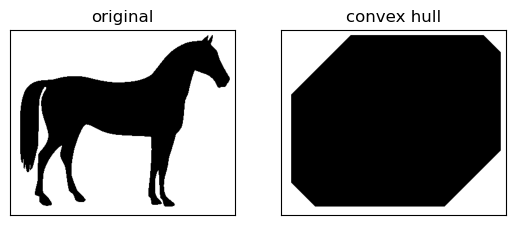

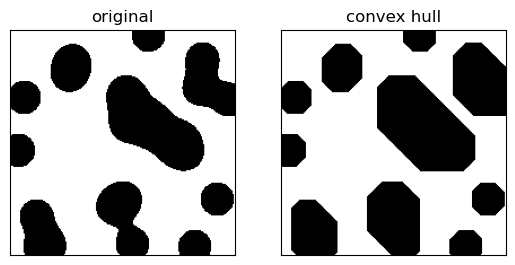

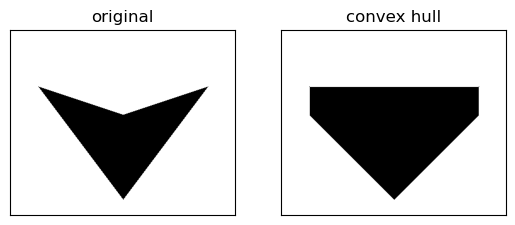

In [144]:
for image in images:
    hull = convex_hull(image)
    print_img(image, hull)